In [1]:
import openai
import yaml
import wandb
import sys, os

from IPython.display import Image

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.utils import *
from src.svg_quality_checks import *
from src.gpt_wrappers import *

# load yaml config
with open("../config.yml", "r") as f:
    config = yaml.safe_load(f)

openai.api_key = config["OPENAI_KEY"]

run = wandb.init(
    project=config['WANDB_PROJECT'], 
    entity=config['WANDB_ENTITY']
)

results_table = wandb.Table(
    columns=[
                "system_prompt", 
                "question_prompt",
                "input_svg",
                "input_png",
                "output_svg",
                "output_png",
                "valid_check",
                "size_check"
    ]
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rachnogstyle. Use `wandb login --relogin` to force relogin


# Zero-shot learning (no examples)

In [2]:
system_prompt = """
    You are an expert in design in different fields, you use different vector graphics tools.
    You deal professionally with SVG files, you know how to create complex design with them.
    Your main jon is to complete design systems and tokens based on the initial inputs. 
    These initial inputs are SVG files that can consist of multiple layers, groups, paths, etc.
    They can be different elements as icons, logos, buttons, checkboxes, etc.
"""

## Case 1: bottom app bar
### Case 1.1 Add a "+" on the right side of the bottom app bar


bottom_app_bar_short_optimized.svg:
Done in 67 ms!
12.4 KiB - 60.7% = 4.877 KiB


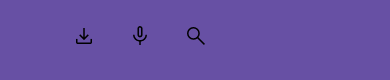

In [3]:
FILENAME = "bottom_app_bar_short"
svg_original = load_raw_svg_optimize_clean_save_png(FILENAME)
Image(filename=f'../data/pngs/{FILENAME}_optimized.png', width=400, height=300)

In [5]:
question = f"""
    This is XML for the SVG file with app bottom bar buttons: \n

    {svg_original}

    Generate SVG where add a button on the right with a big '+' on it in a round shape.

    Keep it as short and optimized as you can.
"""

chatgpt = VanillaChatGPTWrapper(system_prompt)
answer = chatgpt.generate(question)
print("Quality check:", validate_svg(answer), get_svg_size(answer))


bottom_app_bar_short_optimized.svg:
Done in 27 ms!
1.309 KiB - 21.1% = 1.032 KiB


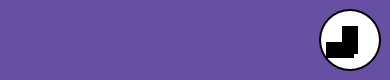

In [6]:
save_gpt_answer_as_svg_and_png(answer, FILENAME)
Image(filename=f'../generated_data/{FILENAME}_optimized.png', width=400, height=300)

In [8]:
results_table.add_data(
    *[
        system_prompt, question, svg_original, wandb.Image(f'../data/pngs/{FILENAME}_optimized.png'),
        answer, wandb.Image(f'../generated_data/{FILENAME}_optimized.png'),
        validate_svg(answer), get_svg_size(answer)
    ]
)

## Case 2: filled button
### Case 2.1: generate other buttons


common_buttons_short_optimized.svg:
Done in 32 ms!
3.814 KiB - 68.6% = 1.199 KiB


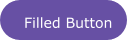

In [9]:
FILENAME = "common_buttons_short"
svg_original = load_raw_svg_optimize_clean_save_png(FILENAME)
Image(filename=f'../data/pngs/{FILENAME}_optimized.png', width=400, height=300)

In [10]:
question = f"""
    This is XML for the SVG file with a single button filled with color: \n

    {svg_original}

    Generate SVG with same button, but variants: filled, elevated and outlined.

    Keep it as short and optimized as you can. 
    Place buttons one under another, adjust the SVG size accordingly.
    Start with <svg ... and end with </svg>
"""

chatgpt = VanillaChatGPTWrapper(system_prompt)
answer = chatgpt.generate(question)
print("Quality check:", validate_svg(answer), get_svg_size(answer))

Quality check: True (127.0, 120.0)



common_buttons_short_optimized.svg:
Done in 30 ms!
2.929 KiB - 13.6% = 2.53 KiB


x_order_2: colinear!


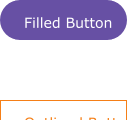

In [12]:
save_gpt_answer_as_svg_and_png(answer, FILENAME)
Image(filename=f'../generated_data/{FILENAME}_optimized.png', width=400, height=300)

In [13]:
results_table.add_data(
    *[
        system_prompt, question, svg_original, wandb.Image(f'../data/pngs/{FILENAME}_optimized.png'),
        answer, wandb.Image(f'../generated_data/{FILENAME}_optimized.png'),
        validate_svg(answer), get_svg_size(answer)
    ]
)

## Case 3: segmented buttons
### Case 3.1: make other buttons active one by one


segmented_buttons_short_optimized.svg:
Done in 63 ms!
13.162 KiB - 70.3% = 3.909 KiB


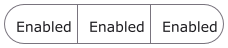

In [14]:
FILENAME = "segmented_buttons_short"
svg_original = load_raw_svg_optimize_clean_save_png(FILENAME)
Image(filename=f'../data/pngs/{FILENAME}_optimized.png', width=400, height=300)

In [15]:
question = f"""
    This is XML for the SVG file with 3 empty segmented buttons panel: \n

    {svg_original}

    Generate SVG with 1 new panel with middle button pressed and active.

    Keep it as short and optimized as you can. 
    Start with <svg ... and end with </svg>
"""

chatgpt = VanillaChatGPTWrapper(system_prompt)
answer = chatgpt.generate(question)
print("Quality check:", validate_svg(answer), get_svg_size(answer))

Quality check: True (228.0, 48.0)



segmented_buttons_short_optimized.svg:
Done in 40 ms!
4.438 KiB - 26.8% = 3.25 KiB


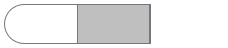

In [16]:
save_gpt_answer_as_svg_and_png(answer, FILENAME)
Image(filename=f'../generated_data/{FILENAME}_optimized.png', width=400, height=300)

In [17]:
results_table.add_data(
    *[
        system_prompt, question, svg_original, wandb.Image(f'../data/pngs/{FILENAME}_optimized.png'),
        answer, wandb.Image(f'../generated_data/{FILENAME}_optimized.png'),
        validate_svg(answer), get_svg_size(answer)
    ]
)

## Case 4: switches
### Case 4.1 select elements + change the color palette


switch_full_optimized.svg:
Done in 100 ms!
22.691 KiB - 63.9% = 8.196 KiB


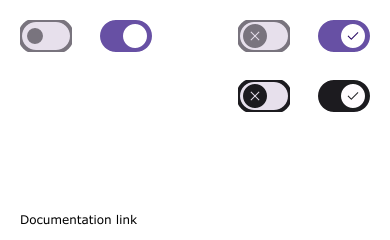

In [18]:
FILENAME = "switch_full"
svg_original = load_raw_svg_optimize_clean_save_png(FILENAME)
Image(filename=f'../data/pngs/{FILENAME}_optimized.png', width=400, height=300)

In [19]:
question = f"""
    This is XML for the SVG file with switch elements: \n

    {svg_original}

    Take only 2 switches.
    Generate a new SVG with these switches, with colors changed - they should be shades of green.

    Keep it as short and optimized as you can. 
    Start with <svg ... and end with </svg>
"""

chatgpt = VanillaChatGPTWrapper(system_prompt)
answer = chatgpt.generate(question)
print("Quality check:", validate_svg(answer), get_svg_size(answer))

Quality check: True (104.0, 64.0)



switch_full_optimized.svg:
Done in 22 ms!
0.587 KiB - 0.7% = 0.583 KiB


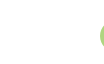

In [20]:
save_gpt_answer_as_svg_and_png(answer, FILENAME)
Image(filename=f'../generated_data/{FILENAME}_optimized.png', width=400, height=300)

In [21]:
results_table.add_data(
    *[
        system_prompt, question, svg_original, wandb.Image(f'../data/pngs/{FILENAME}_optimized.png'),
        answer, wandb.Image(f'../generated_data/{FILENAME}_optimized.png'),
        validate_svg(answer), get_svg_size(answer)
    ]
)

## Publish results to wandb

In [22]:
run.log({"results_table": results_table})